## Importing data

In [8]:
import pandas as pd 

bank_df = pd.read_csv('/Users/emanuelciudin/Documents/development/Machine Learning with Finance/bankPortfolios.csv', header=None)
display(bank_df.head())
print(bank_df.shape)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2699.0,6107.0,9965.0,1036.0,2924.0,3786.0,4573.0,1087.0,617.0,76.827,769.0,1828.2,381.0,933.0,32673.0,1
1,759920.0,6480.0,588660.0,528110.0,1188700.0,169400.0,174890.0,10210.0,6566.0,21101.000,211210.0,428740.0,82487.0,68882.0,3770300.0,1
2,129080.0,729.0,72972.0,3310.0,73909.0,34.0,44928.0,32995.0,409.0,502.000,15599.0,57902.0,20800.0,12168.0,423250.0,1
3,57828.0,1449.8,27634.0,1739.0,39274.0,1838.3,9854.0,1900.0,321.0,228.980,2291.9,7696.0,4609.0,7823.0,145830.0,1
4,1021.0,14222.0,3186.0,35.0,4776.0,29645.0,9295.0,3245.0,493.0,215.000,4932.0,20818.0,891.0,3661.0,87600.0,1


(7783, 16)


In [9]:
# Check for missing values
missing_values = bank_df.isnull().sum()
print(missing_values)

# Count how many 1's and 0's are in column 15
print(bank_df[15].value_counts())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64
15
0    7477
1     306
Name: count, dtype: int64


## Data Preprocessing

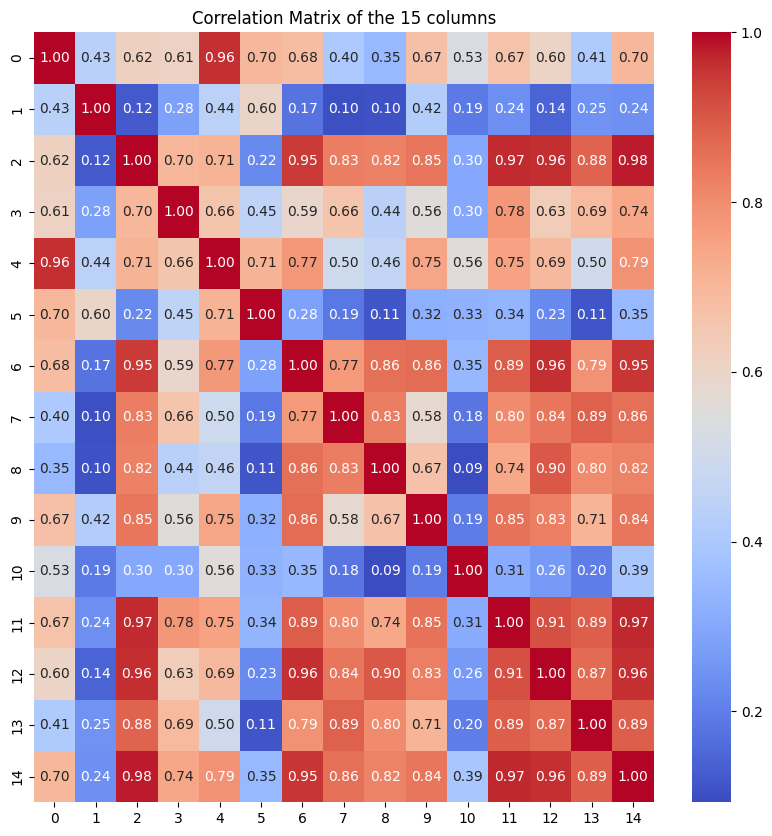

In [10]:
# Plot the correlation matrix between columns 0 to 14
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(bank_df.iloc[:, 0:15].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of the 15 columns')
plt.show()

## ANOVA for imbalanced and balanced dataset

Feature 0: 2.159276
Feature 1: 0.136712
Feature 2: 0.311096
Feature 3: 0.083901
Feature 4: 0.001265
Feature 5: 0.318941
Feature 6: 0.369737
Feature 7: 0.368863
Feature 8: 0.131280
Feature 9: 0.207353
Feature 10: 0.160227
Feature 11: 0.237695
Feature 12: 0.107417
Feature 13: 0.291133
Feature 14: 0.227206


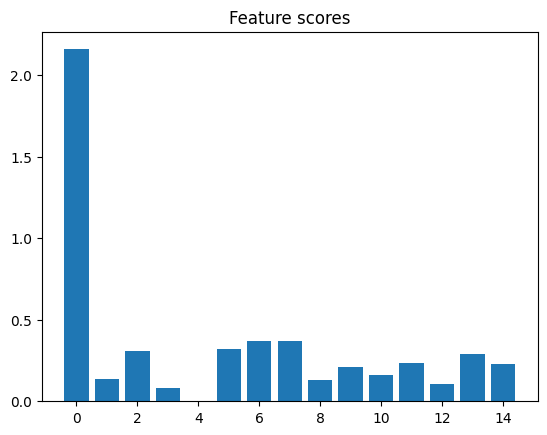

In [11]:
X = bank_df.iloc[:, 0:15]
Y = bank_df.iloc[:, 15]

# Split the data into training and testing sets stratified by Y

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Apply ANOVA to select the best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create an instance of SelectKBest
k_best = SelectKBest(f_classif, k='all')

# Fit the instance to the data
k_best.fit(X_train, Y_train) #REMEMBER TO ONLY DO THIS ON TRAINING DATA AND NOT THE WHOLE DATASET OTHERWISE YOU WILL LEAK DATA

# Get the scores of the features
scores = k_best.scores_
for i in range(len(k_best.scores_)):
 print('Feature %d: %f' % (i, k_best.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(k_best.scores_))], k_best.scores_)
plt.title('Feature scores')
plt.show()


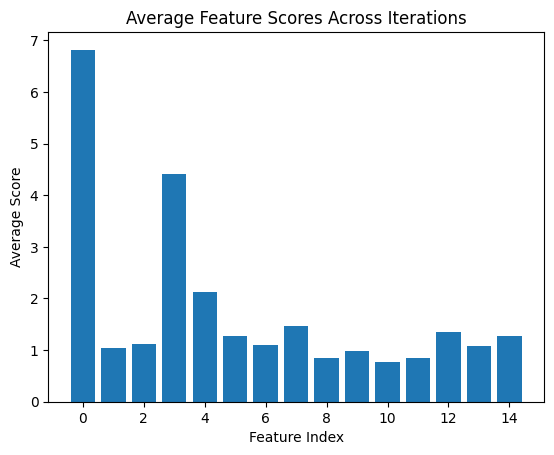

Feature 0: 6.820083
Feature 3: 4.406721
Feature 4: 2.120149
Feature 7: 1.460170
Feature 12: 1.355768
Feature 5: 1.281993
Feature 14: 1.280153
Feature 2: 1.119254
Feature 6: 1.104350
Feature 13: 1.089144
Feature 1: 1.036833
Feature 9: 0.976645
Feature 8: 0.852666
Feature 11: 0.846667
Feature 10: 0.767199
Top 5 Features: Index([0, 3, 4, 7, 12], dtype='int64')


In [12]:
# This code will apply a bootstrap method (or whatever it was called research)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif

# Assuming bank_df is your DataFrame and it's already been loaded

X = bank_df.iloc[:, 0:15]
Y = bank_df.iloc[:, 15]

# Split the data into training and testing sets, stratified by Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Separate the majority and minority classes in both X and Y
majority_X = X_train[Y_train == 0]
minority_X = X_train[Y_train == 1]
majority_Y = Y_train[Y_train == 0]
minority_Y = Y_train[Y_train == 1]

# Determine the number of splits based on the size of the minority class
n_splits = len(majority_X) // len(minority_X)

# Placeholder for aggregated scores
aggregated_scores = np.zeros(X_train.shape[1])

for i in range(n_splits):
    # Randomly sample from the majority class to match the minority class size, ensure we also select corresponding Y values
    sample_indices = majority_X.sample(n=len(minority_X), random_state=i).index
    majority_sample_X = majority_X.loc[sample_indices]
    majority_sample_Y = majority_Y.loc[sample_indices]
    
    # Combine the current majority sample with the minority class for both X and Y
    X_balanced = pd.concat([majority_sample_X, minority_X])
    Y_balanced = pd.concat([majority_sample_Y, minority_Y])
    
    # Apply ANOVA (f_classif) on the balanced dataset
    scores = f_classif(X_balanced, Y_balanced)[0]
    
    # Aggregate the scores from this iteration
    aggregated_scores += scores

# Average the aggregated scores over all iterations
average_scores = aggregated_scores / n_splits

# Plot the average scores
plt.bar(np.arange(len(average_scores)), average_scores)
plt.title('Average Feature Scores Across Iterations')
plt.xlabel('Feature Index')
plt.ylabel('Average Score')
plt.show()

# Print the average scores in descending order
sorted_indices = np.argsort(average_scores)[::-1]
for i in sorted_indices:
    print('Feature %d: %f' % (i, average_scores[i]))

# Select the top 5 features
top_5_indices = sorted_indices[:5]
top_5_features = X.columns[top_5_indices]
print('Top 5 Features:', top_5_features)


## PCA on top 5 ANOVA Features

In [36]:
# Apply PCA for the top 5 features

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets, stratified by Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to the top 5 features
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled[:, top_5_indices])
print(X_train_pca.shape)
X_test_pca = pca.transform(X_test_scaled[:, top_5_indices])

# Print the explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
print('Total Explained Variance:', np.sum(pca.explained_variance_ratio_))

print(X_train_pca.shape)
print(X_train.shape)

(6226, 3)
Explained Variance Ratio: [0.72918072 0.16873307 0.07684883]
Total Explained Variance: 0.9747626193761155
(6226, 3)
(6226, 15)


## Logistic Regression

15
0    5981
1    2990
Name: count, dtype: int64
Accuracy: 0.9312780989081567


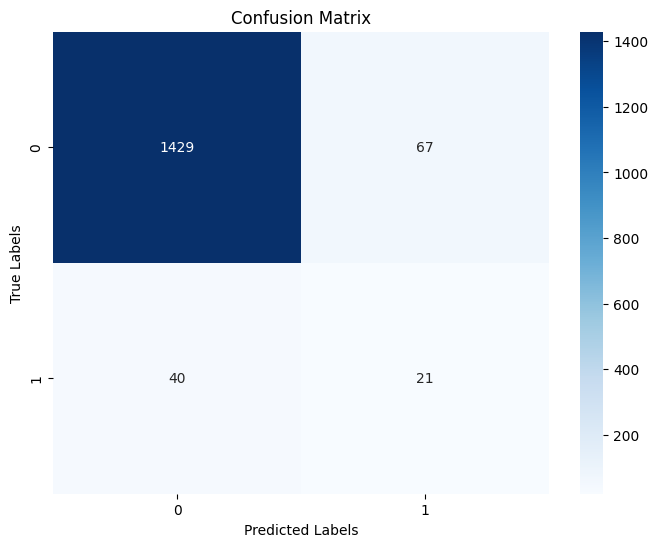

AUROC: 0.8223568861225563


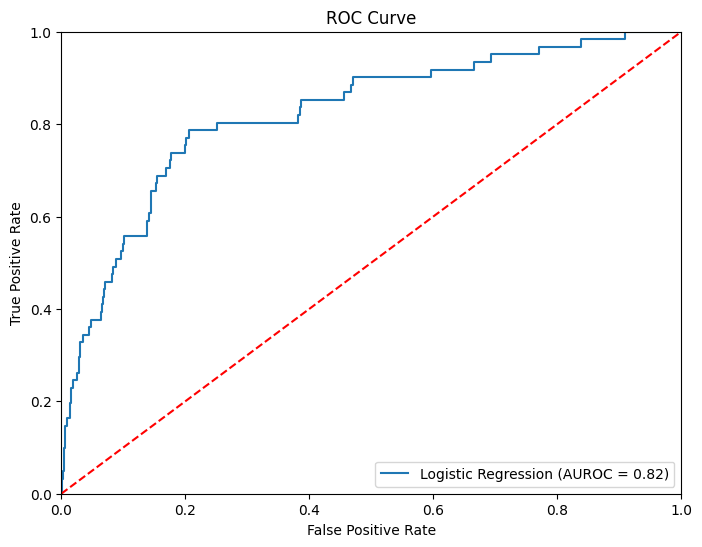

In [127]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Initialise the data
X = bank_df.iloc[:, 0:15]
Y = bank_df.iloc[:, 15]

# Split the data into training and testing sets, stratified by Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Scaling doesn't help the performance of Logistic Regression in this case

# Create an instance of SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.5)

# Fit the instance to the data
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Count the number of 1's and 0's in the balanced dataset
print(pd.Series(Y_train_smote).value_counts())

# Create an instance of Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=2000)

# Fit the model to the balanced data
log_reg.fit(X_train_smote, Y_train_smote)

# Predict the testing data
Y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Get the predicted probabilities
Y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the AUROC
auroc = roc_auc_score(Y_test, Y_pred_prob)
print('AUROC:', auroc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Logistic Regression with Validation

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'logistic__C': 0.001, 'smote__sampling_strategy': 0.75}
Best AUROC: 0.8265802437520552
Accuracy: 0.9087989723827874
AUROC: 0.8178421144911019


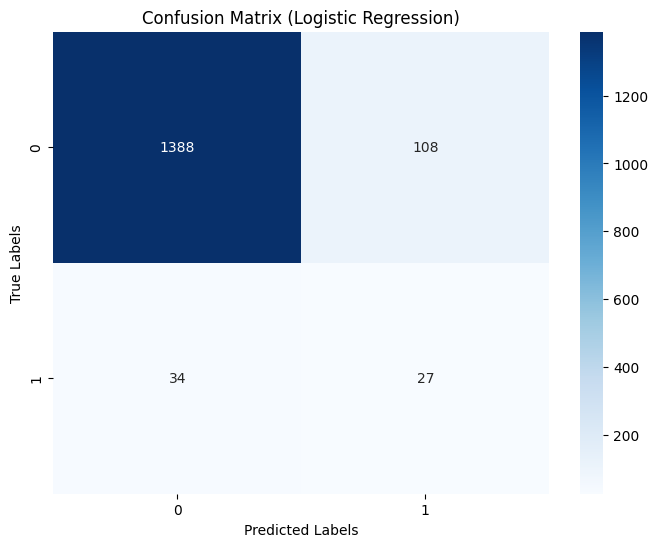

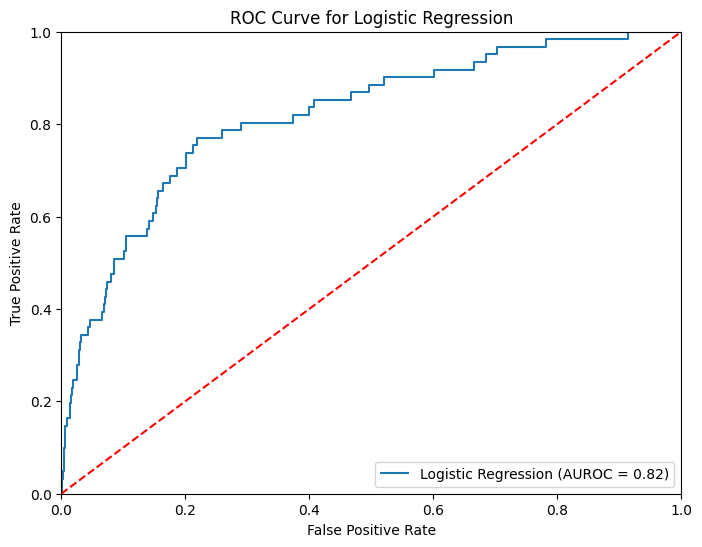

F1 Score: 0.2755102040816326
Precision: 0.2
Recall: 0.4426229508196721


In [15]:
# Complete Logistic Regression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, f1_score

# Assuming bank_df is defined

# Initialise the data
X = bank_df.iloc[:, 0:15]
Y = bank_df.iloc[:, 15]

# Split the data into training and testing sets, stratified by Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


# Define a pipeline that first applies SMOTE and then fits a logistic regression model
pipeline = ImPipeline([
    
    ('smote', SMOTE(random_state=42)),
    ('logistic', LogisticRegression(random_state=42, max_iter=3000))
])

# Define parameter grid
param_grid = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'logistic__C': [0.0001, 0.001, 0.01, 0.1],
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best AUROC:', grid_search.best_score_)

# Predict the testing data using the best found model
Y_pred = grid_search.predict(X_test)
Y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Calculate the accuracy and AUROC
accuracy = accuracy_score(Y_test, Y_pred)
auroc = roc_auc_score(Y_test, Y_pred_prob)

print('Accuracy:', accuracy)
print('AUROC:', auroc)

# Create and display the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Compute F1 score, Precision and Recall

f1 = f1_score(Y_test, Y_pred)
print('F1 Score:', f1)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print('Precision:', precision)
print('Recall:', recall)


/Users/emanuelciudin/.pyenv/versions/3.10.13/envs/my_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emanuelciudin/.pyenv/versions/3.10.13/envs/my_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Optimal number of features:  15
Selected features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Accuracy: 0.8932584269662921


/Users/emanuelciudin/.pyenv/versions/3.10.13/envs/my_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emanuelciudin/.pyenv/versions/3.10.13/envs/my_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

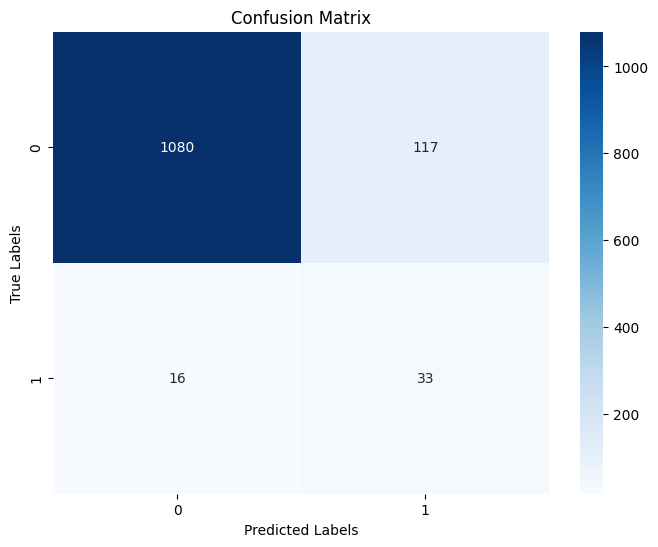

AUROC: 0.8109218624793275


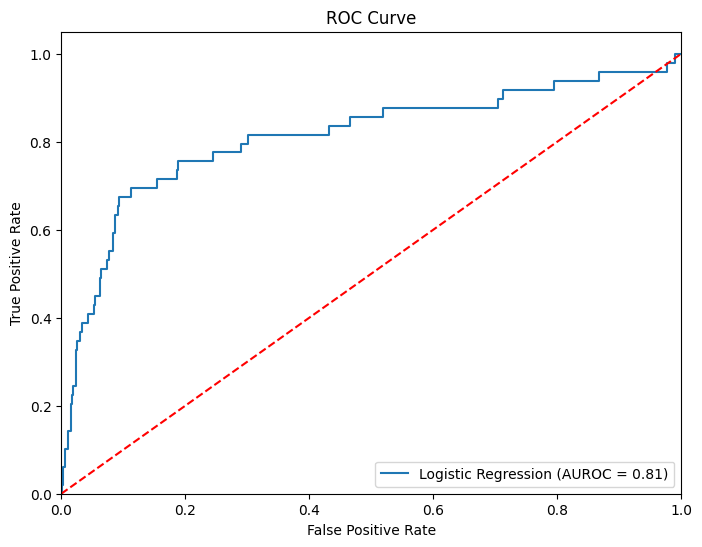

In [120]:
# Logistic Regression RFE

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold

# Initialise the data
X = bank_df.iloc[:, 0:15]
Y = bank_df.iloc[:, 15]

# Split the data into training and testing sets, stratified by Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train)

# Create an instance of SMOTE and balance the training data
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Use RFECV to determine the optimal number of features and perform feature selection
# StratifiedKFold is used to maintain the target distribution within each fold
cv_strategy = StratifiedKFold(n_splits=5)
rfe_cv = RFECV(estimator=log_reg, step=1, cv=cv_strategy, scoring='roc_auc')
rfe_cv.fit(X_train_smote, Y_train_smote)

# Print the optimal number of features
print("Optimal number of features: ", rfe_cv.n_features_)

# Print the selected features
selected_features = X_train.columns[rfe_cv.support_]
print("Selected features: ", selected_features.tolist())

# Fit the model using selected features to the balanced data
log_reg.fit(X_train_smote[selected_features], Y_train_smote)

# Predict the testing data using selected features
Y_pred = log_reg.predict(X_val[selected_features])

# Calculate the accuracy
accuracy = accuracy_score(Y_val, Y_pred)
print('Accuracy:', accuracy)

# Create and display the confusion matrix
conf_matrix = confusion_matrix(Y_val, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Get the predicted probabilities for the test set using selected features
Y_pred_prob = log_reg.predict_proba(X_val[selected_features])[:, 1]

# Calculate and print the AUROC
auroc = roc_auc_score(Y_val, Y_pred_prob)
print('AUROC:', auroc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_val, Y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Logistic Regression on PCA Data

The shape of X_train_scaled[:, top_5_indices] is: (6226, 5)
Explained Variance Ratio: [0.72918072 0.16873307 0.07684883]
Total Explained Variance: 0.9747626193761164
15
0    5981
1    5981
Name: count, dtype: int64
Accuracy: 0.9107257546563905


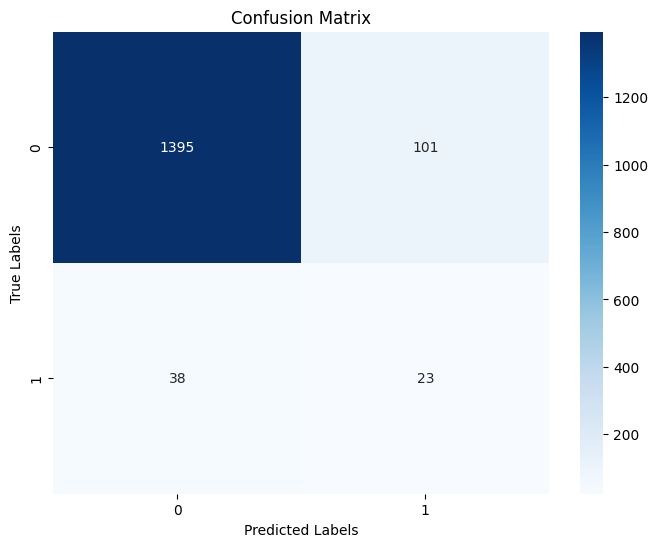

AUROC: 0.7223744192162707


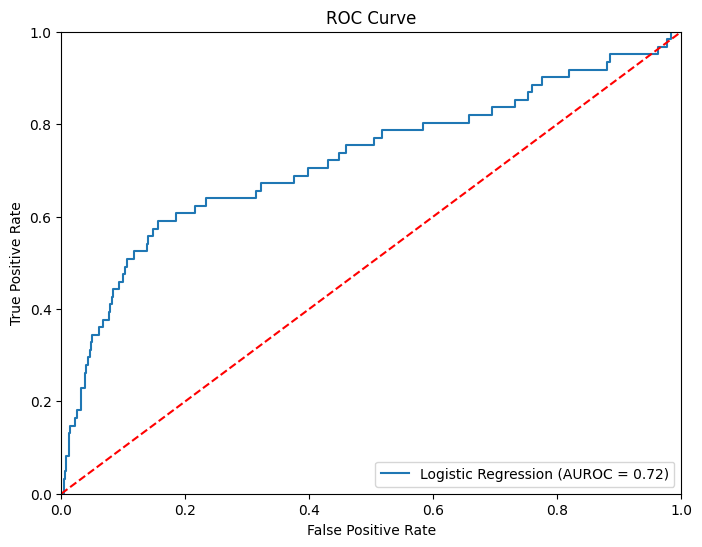

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = bank_df.iloc[:, 0:15]
Y = bank_df.iloc[:, 15]

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Split the data into training and testing sets, stratified by Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to the top 5 features
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled[:, top_5_indices])
print("The shape of X_train_scaled[:, top_5_indices] is:", X_train_scaled[:, top_5_indices].shape)
X_test_pca = pca.transform(X_test_scaled[:, top_5_indices])

# Print the explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
print('Total Explained Variance:', np.sum(pca.explained_variance_ratio_))

# Fit the instance to the data
X_train_smote, Y_train_smote = smote.fit_resample(X_train_pca, Y_train)

# Count the number of 1's and 0's in the balanced dataset
print(pd.Series(Y_train_smote).value_counts())

# Use Logistic Regression to classify the data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Fit the model to the balanced data
log_reg.fit(X_train_smote, Y_train_smote)

# Predict the testing data
Y_pred = log_reg.predict(X_test_pca)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Calculate the confusion matrix

from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate AUROC and plot the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve

# Get the predicted probabilities
Y_pred_prob = log_reg.predict_proba(X_test_pca)[:, 1]

# Calculate the AUROC
auroc = roc_auc_score(Y_test, Y_pred_prob)
print('AUROC:', auroc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression considering just top 5 features

the top 5 indices are: [ 0  3  4  7 12]
15
0    5981
1    5981
Name: count, dtype: int64
Accuracy: 0.899165061014772


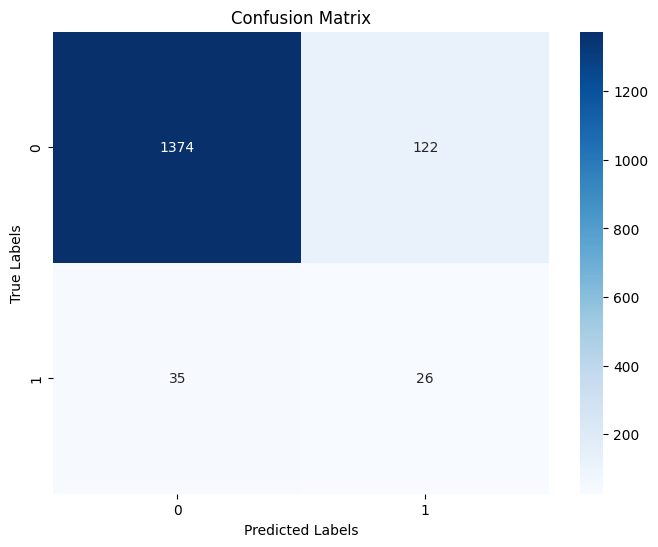

AUROC: 0.7790501446480231


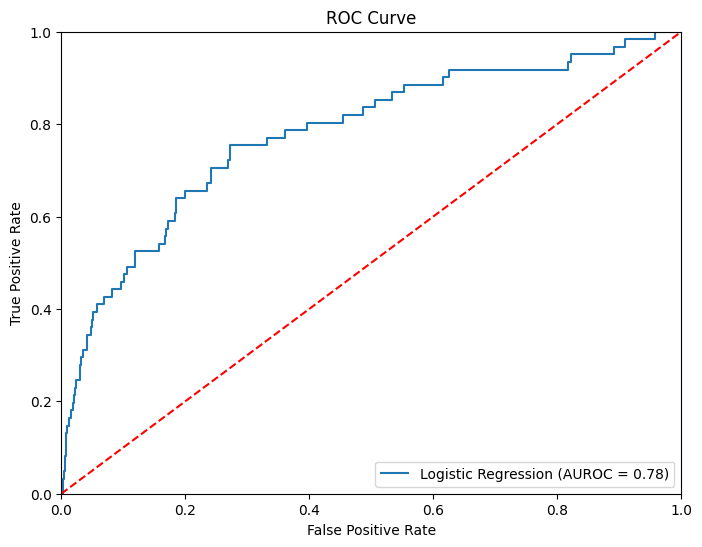

In [40]:
from imblearn.over_sampling import SMOTE
X = bank_df.iloc[:, 0:15]
Y = bank_df.iloc[:, 15]

# Split the data into training and testing sets, stratified by Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print('the top 5 indices are:', top_5_indices)
X_train = X_train.iloc[:, top_5_indices]
X_test = X_test.iloc[:, top_5_indices]
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit the instance to the data
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Count the number of 1's and 0's in the balanced dataset
print(pd.Series(Y_train_smote).value_counts())

# Use Logistic Regression to classify the data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Fit the model to the balanced data
log_reg.fit(X_train_smote, Y_train_smote)

# Predict the testing data
Y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Calculate the confusion matrix

from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate AUROC and plot the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve

# Get the predicted probabilities
Y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the AUROC
auroc = roc_auc_score(Y_test, Y_pred_prob)
print('AUROC:', auroc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression with PCA but no ANOVA

Explained Variance Ratio: [0.66024235 0.16774853 0.05808466 0.04404998 0.03147868 0.01497896]
Total Explained Variance: 0.9765831571342656
15
0    5981
1    5981
Name: count, dtype: int64
Accuracy: 0.8953114964675658


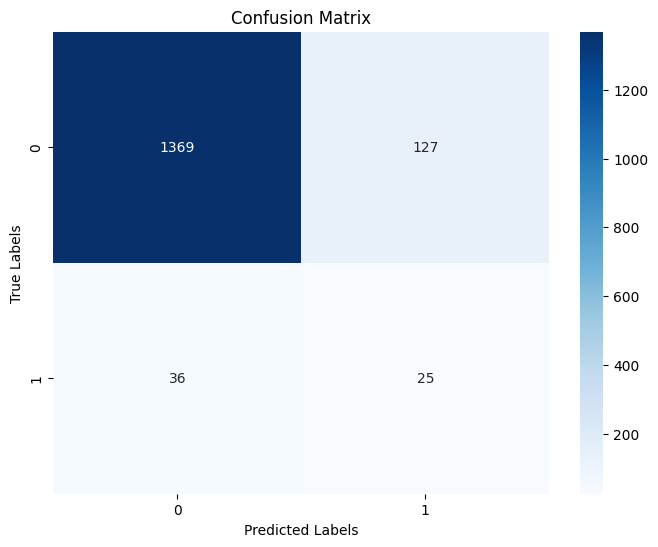

AUROC: 0.8124397299903567


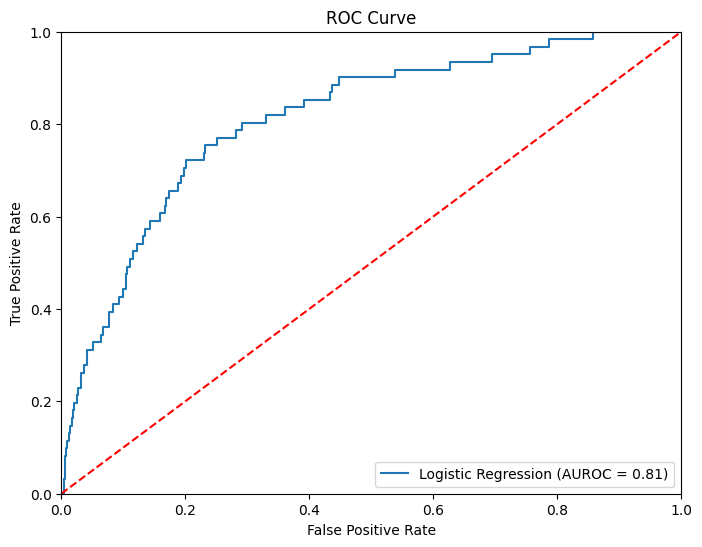

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = bank_df.iloc[:, 0:15]
Y = bank_df.iloc[:, 15]

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Split the data into training and testing sets, stratified by Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to the top 5 features
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
print('Total Explained Variance:', np.sum(pca.explained_variance_ratio_))

# Fit the instance to the data
X_train_smote, Y_train_smote = smote.fit_resample(X_train_pca, Y_train)

# Count the number of 1's and 0's in the balanced dataset
print(pd.Series(Y_train_smote).value_counts())

# Use Logistic Regression to classify the data

log_reg = LogisticRegression(random_state=42)

# Fit the model to the balanced data
log_reg.fit(X_train_smote, Y_train_smote)

# Predict the testing data
Y_pred = log_reg.predict(X_test_pca)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Calculate the confusion matrix

from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate AUROC and plot the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve

# Get the predicted probabilities
Y_pred_prob = log_reg.predict_proba(X_test_pca)[:, 1]

# Calculate the AUROC
auroc = roc_auc_score(Y_test, Y_pred_prob)
print('AUROC:', auroc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'random_forest__max_depth': 10, 'random_forest__n_estimators': 500, 'smote__sampling_strategy': 0.5}
Best AUROC: 0.8591509231751141
Accuracy: 0.9293513166345536
AUROC: 0.837720259489787


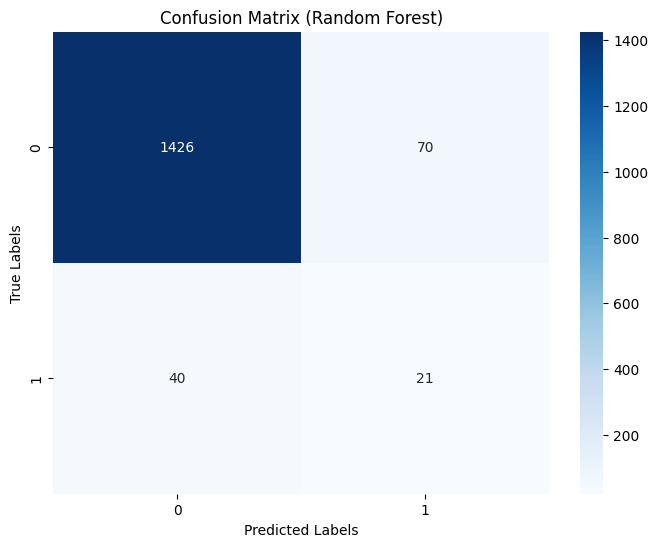

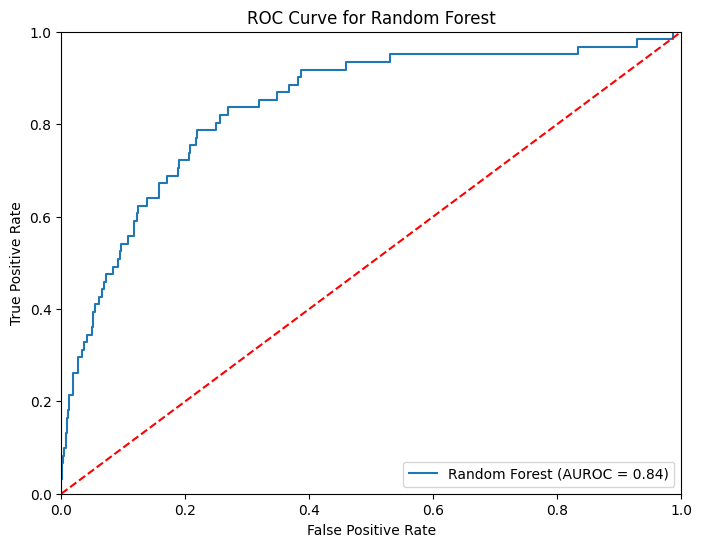

F1 Score: 0.27631578947368424
Precision: 0.23076923076923078
Recall: 0.3442622950819672


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, f1_score

# Initialise the data
X = bank_df.iloc[:, 0:15]
Y = bank_df.iloc[:, 15]

# Split the data into training and testing sets, stratified by Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


# Define a pipeline that first applies SMOTE and then fits a Random Forest model
pipeline = ImPipeline([
    ('scale', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42))
])

# Define parameter grid
param_grid = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'random_forest__n_estimators': [200, 500],
    'random_forest__max_depth': [None, 5, 10, 20]
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best AUROC:', grid_search.best_score_)

# Predict the testing data using the best found model
Y_pred = grid_search.predict(X_test)
Y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Calculate the accuracy and AUROC
accuracy = accuracy_score(Y_test, Y_pred)
auroc = roc_auc_score(Y_test, Y_pred_prob)

print('Accuracy:', accuracy)
print('AUROC:', auroc)

# Create and display the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Compute F1 score, Precision and Recall

f1 = f1_score(Y_test, Y_pred)
print('F1 Score:', f1)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print('Precision:', precision)
print('Recall:', recall)


## SVM

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'smote__sampling_strategy': 0.75, 'svm__C': 0.01, 'svm__kernel': 'linear'}
Best AUROC: 0.8366877965509639
Accuracy: 0.9543994861913937
AUROC: 0.7785186727448058


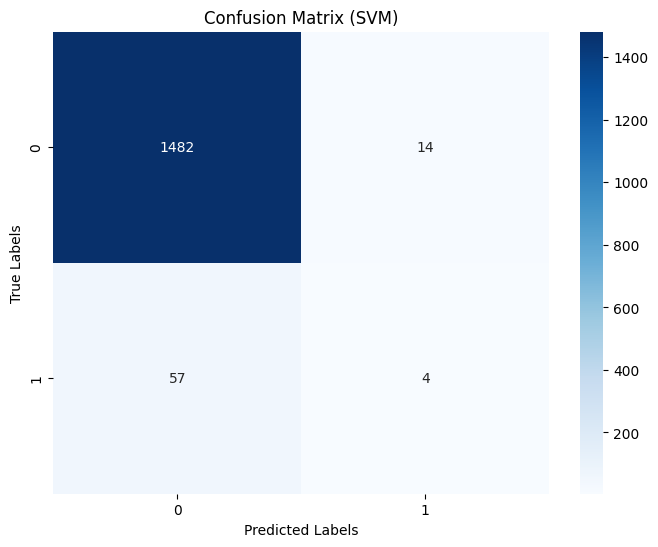

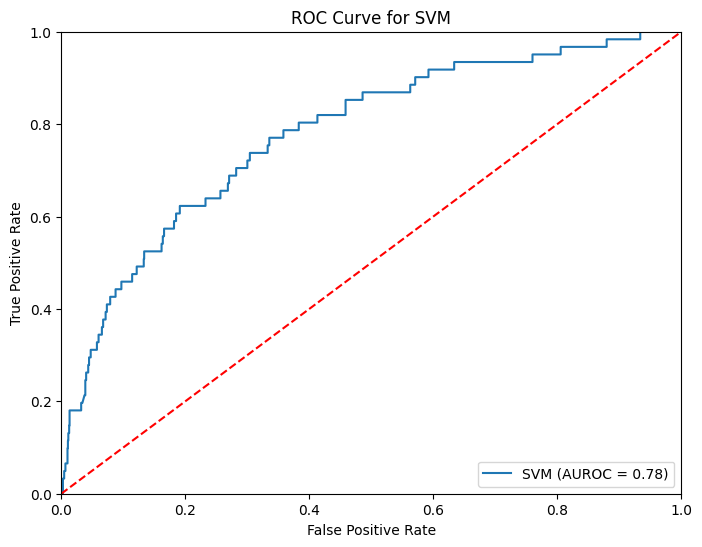

F1 Score: 0.10126582278481013
Precision: 0.2222222222222222
Recall: 0.06557377049180328


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, f1_score

# Assuming bank_df is defined

# Initialise the data
X = bank_df.iloc[:, 0:15]
Y = bank_df.iloc[:, 15]

# Split the data into training and testing sets, stratified by Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Define a pipeline that first scales data, then applies SMOTE and fits an SVM model
pipeline = ImPipeline([
    ('scale', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(random_state=42, probability=True))  # probability=True to enable predict_proba
])

# Define parameter grid
param_grid = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'svm__C': [0.001, 0.01, 0.1, 1],
    'svm__kernel': ['linear', 'poly', 'sigmoid']
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best AUROC:', grid_search.best_score_)

# Predict the testing data using the best found model
Y_pred = grid_search.predict(X_test)
Y_pred_prob = grid_search.predict_proba(X_test)[:, 1]  # This works because of probability=True

# Calculate the accuracy and AUROC
accuracy = accuracy_score(Y_test, Y_pred)
auroc = roc_auc_score(Y_test, Y_pred_prob)

print('Accuracy:', accuracy)
print('AUROC:', auroc)

# Create and display the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='SVM (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

# Compute F1 score, Precision and Recall

f1 = f1_score(Y_test, Y_pred)
print('F1 Score:', f1)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print('Precision:', precision)
print('Recall:', recall)
